## Trust in government institutions has been rising, particularly among young people.


Sreekanth Reddy Sajjala
[MIT License](https://en.wikipedia.org/wiki/MIT_License)

### Importing the required packages

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

import utils
from utils import decorate
from thinkstats2 import Pmf, Cdf
import matplotlib
from matplotlib.pyplot import *


## Loading and validation


In [2]:
def read_gss(dirname):
    """Reads GSS files from the given directory.
    
    dirname: string
    
    returns: DataFrame
    """
    dct = utils.read_stata_dict(dirname + '/GSS.dct')
    gss = dct.read_fixed_width(dirname + '/GSS.dat.gz',
                             compression='gzip')
    return gss

**GSS data shape**

In [3]:
gss = read_gss('gss_eda')
print(gss.shape)
gss.head()

(62466, 101)


,year,id_,agewed,divorce,sibs,childs,age,educ,paeduc,maeduc,...,memchurh,realinc,cohort,marcohrt,ballot,wtssall,adults,compuse,databank,wtssnr
0,1972,1,0,0,3,0,23,16,10,97,...,0,18951.0,1949,0,0,0.4446,1,0,0,1.0
1,1972,2,21,2,4,5,70,10,8,8,...,0,24366.0,1902,1923,0,0.8893,2,0,0,1.0
2,1972,3,20,2,5,4,48,12,8,8,...,0,24366.0,1924,1944,0,0.8893,2,0,0,1.0
3,1972,4,24,2,5,0,27,17,16,12,...,0,30458.0,1945,1969,0,0.8893,2,0,0,1.0
4,1972,5,22,2,2,2,61,12,8,8,...,0,50763.0,1911,1933,0,0.8893,2,0,0,1.0


Most variables use special codes to indicate missing data.  We have to be careful not to use these codes as numerical data; one way to manage that is to replace them with `NaN`, which Pandas recognizes as a missing value. We will be doing that to all the variables we plan to use today

In [4]:
def replace_invalid(df):
    df.realinc.replace([0], np.nan, inplace=True)                  
    df.educ.replace([98,99], np.nan, inplace=True)
    # 89 means 89 or older
    df.age.replace([98, 99], np.nan, inplace=True) 
    df.cohort.replace([9999], np.nan, inplace=True)
    df.adults.replace([9], np.nan, inplace=True)
    df.confed.replace([0,8,9], np.nan, inplace=True)
    df.conclerg.replace([0,8,9], np.nan, inplace=True)        
    df.conpress.replace([0,8,9], np.nan, inplace=True)
    df.conlegis.replace([0,8,9], np.nan, inplace=True)        
    df.conarmy.replace([0,8,9], np.nan, inplace=True)        
    df.conjudge.replace([0,8,9], np.nan, inplace=True)
    df.owngun.replace([0,3,8,9], np.nan, inplace=True)
    

replace_invalid(gss)

#### Confidence in the Federal government by age and year surveyed
Looking at the news on TV and going through social media, one gets the feeling that fewer and fewer people have high levels of confidence in the branches of government. In this project we shall examine how the trust levels in the various branches of the government and  the press have changed over the years among various age groups. The GSS dataset has collected this data right from 1972. In the second part of the project we shall be looking at possible correlations and factors which may explain the changes in trust levels.

**Faith in the excecutive branch  of the government**

In this first figure we shall see the trends in how the confidence in the executive branch of the federal government has changed over the years in people of different ages. This will allow us to see any difference between people of different ages.




In [71]:
def plot_with_error(category,title):
    age2=gss[(gss['age']>20) & (gss['age']<30)];
    age3=gss[(gss['age']>30) & (gss['age']<40)];
    age4=gss[(gss['age']>40) & (gss['age']<50)];
    age5=gss[(gss['age']>50) & (gss['age']<60)];
    age6=gss[(gss['age']>60)];
    fig, ax = subplots()
    grouped6=age6.groupby('year')
    grouped2=age2.groupby('year')
    grouped3=age3.groupby('year')
    grouped4=age4.groupby('year')
    grouped5=age5.groupby('year')
    series2=grouped2[category].mean()
    series3=grouped3[category].mean()
    series4=grouped4[category].mean()
    series5=grouped5[category].mean()
    series6=grouped6[category].mean()
    err2=grouped2[category].sem()
    err3=grouped3[category].sem()
    err4=grouped4[category].sem()
    err5=grouped5[category].sem()
    err6=grouped6[category].sem()
    series2.plot(color='C2',yerr=err2)
    series3.plot(color='C3',yerr=err3)
    series4.plot(color='C4',yerr=err4)
    series5.plot(color='C5',yerr=err4)
    series6.plot(color='C6',yerr=err5)
    ax.legend(["20-30", "30-40", "40-50","50-60","60+"])
    plt.title(title)

    

/home/ssajjala/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/ssajjala/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/ssajjala/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/ssajjala/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/ssajjala/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/ssajjala/anaconda3/lib/python3.7/site-packages/numpy/c

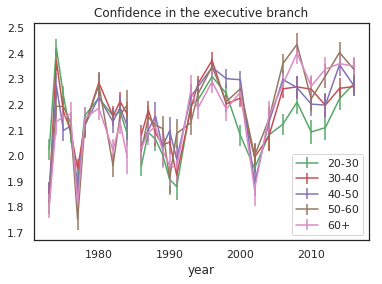

In [73]:
plot_with_error('confed',"Confidence in the executive branch")

The data was recorded the following way, a 1 indicated no confidence in the executive branch, a 2 indicates reasonable amounts of confidence and a 3 indicates a very high level of confidence. 

What we see in the graph is that until the mid 2000s, all age groups' confidence in the executive branch was almost the same. The divergence might have started off as computer use(Graphed below) and internet penetration allowed more forms of media and opinions. It could also be due to increased polarization. This could have led to people forming their opinions differently on the basis of what they are most exposed to. Other observations include the dips in confidences at various points which can be attributed to the watergate scandal and the 9/11 attacks. Confidence in the federal government is almost at its highest ever levels now. 

**Confidence in the Judicial branch of the govenment**

Now lets look at confidence levels in the Judicial branch of the government. This would interesting to explore as we can observe how it changes along with the confidence in the executive branch of the government. Again this is plotted in the same way, looking at confidence levels at various ages across years.

/home/ssajjala/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/ssajjala/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/ssajjala/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/ssajjala/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/ssajjala/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/ssajjala/anaconda3/lib/python3.7/site-packages/numpy/c

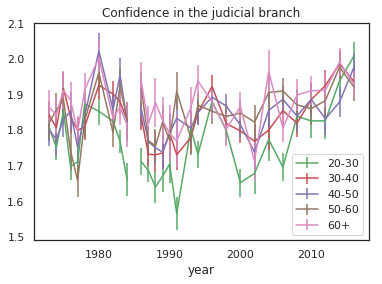

In [137]:
plot_with_error('conjudge',"Confidence in the judicial branch")

We can see that the spread in the confidence on the judicial branch is smaller compared to the executive branch. We also see greater divergence between age groups which might be due to the face the young people might have lesser experience with the judiciary. Once again the confidence in the branch is around its all time peak

**Confidence in the legislative branch**

We shall round off this visulization of the confidence in the government with the legislative branch.

/home/ssajjala/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/ssajjala/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/ssajjala/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/ssajjala/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/ssajjala/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/ssajjala/anaconda3/lib/python3.7/site-packages/numpy/c

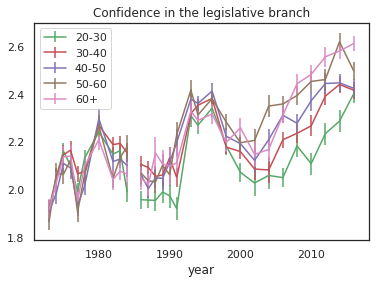

In [76]:
plot_with_error('conlegis',"Confidence in the legislative branch")

This graph to me is very interesting because from what I have heard as a foreign citizen, I was under the belief that people were losing their confidence in the house and senate's ability to take action and stay non-corrupt from the influence of lobbying. This graph proves otherwise with confidence hitting an all time peak. We once again see the trend of divergence beginning only recently. The size of the variation indicated by the error bars has also grown.


Now we shall explore factors like the confidence in the army, confidence in the press and how stable people belive they are financially. This is to explore if these factors explain the previous trends we have explored. 

We shall first breifly visualize these factors in the same way as we did previously, then visualize correlations and then try to perform regression analysis.

**Confidence in the press**

/home/ssajjala/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/ssajjala/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/ssajjala/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/ssajjala/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/ssajjala/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/ssajjala/anaconda3/lib/python3.7/site-packages/numpy/c

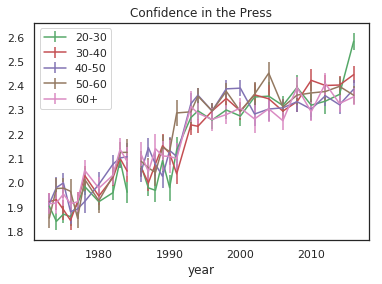

In [77]:
plot_with_error('conpress',"Confidence in the Press")

The confidence in the press has risen steadily till the 1992 and it grew really fast till 1995. It has since grown slower and the trust in the press by younger people has risen sharply since around 2011, indicating the impact of the internet.

**Confidence in the army**

/home/ssajjala/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/ssajjala/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/ssajjala/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/ssajjala/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/ssajjala/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/ssajjala/anaconda3/lib/python3.7/site-packages/numpy/c

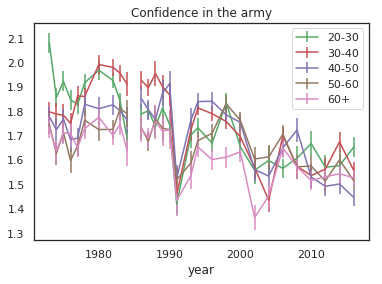

In [78]:
plot_with_error('conarmy',"Confidence in the army")

Confidence in the army is the first thing where we have seen a constantly decreasing trend. It could be attributed to the fact gorwing military spending has been frowned upon and the spread of that information through the internet could be the cause. This is also confusing as it could be seen either as confidence in the military's ability to protect the nation or confidence in how well they are run.

/home/ssajjala/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/ssajjala/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/ssajjala/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/ssajjala/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/ssajjala/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/ssajjala/anaconda3/lib/python3.7/site-packages/numpy/c

Text(0, 0.5, 'Confidence in the federal government')

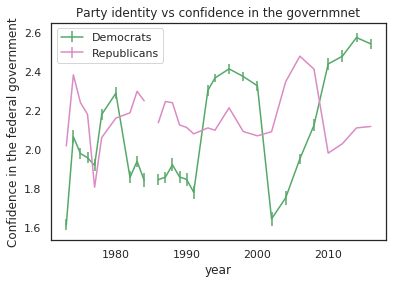

In [132]:
repub=gss[(gss['partyid']>=0) & (gss['partyid']<=2)];
demo=gss[(gss['partyid']>=4) & (gss['partyid']<7)];


fig, ax = subplots()
grouped6=repub.groupby('year')
grouped2=demo.groupby('year')

series2=grouped2['confed'].mean()

series6=grouped6['confed'].mean()
err2=grouped2['confed'].sem()

err6=grouped6['confed'].sem()
series2.plot(color='C2',yerr=err2)


series6.plot(color='C6',yerr=err5)
ax.legend(["Democrats","Republicans"])
plt.title("Party identity vs confidence in the governmnet")
plt.ylabel('Confidence in the federal government')

Visualizing  the confidence in the federal government by  party identity shows what we would expect, each party trusts the government more when they are in power. the Democrats seem to vary in a higher range.

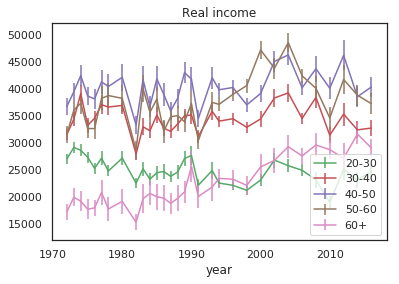

In [80]:
plot_with_error('realinc',"Real income")

Plotting the real income at different ages over the years could help us figure out why the confidence levels in the government change. Incomes for young people and the old people have changed a lot. This could help explain why young people's trust in the the government is the highest, because lower income people tend to trust the government more as shown in a correlation below.

**Correlations to help make models for predictions**

Lets look how the dependent variables correlate with the explanatory variables inorder to build regression models for prediciting the trust in the government. We shall use the executive branch for this analysis as repeating the same analysis for all 3 branches would be very mechanical and a correlation exists between all 3 branches.

Lets start with the correlation between the army and executive branch

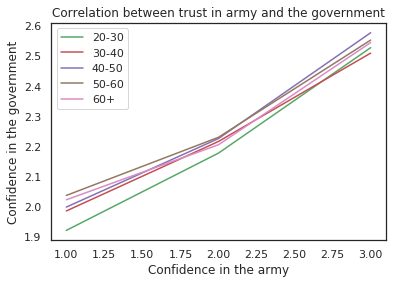

In [87]:
def correlation_with_error(groupby,category,title,xlabel,ylabel):
    age2=gss[(gss['age']>20) & (gss['age']<30)];
    age3=gss[(gss['age']>30) & (gss['age']<40)];
    age4=gss[(gss['age']>40) & (gss['age']<50)];
    age5=gss[(gss['age']>50) & (gss['age']<60)];
    age6=gss[(gss['age']>60)];
    fig, ax = subplots()
    grouped6=age6.groupby(groupby)
    grouped2=age2.groupby(groupby)
    grouped3=age3.groupby(groupby)
    grouped4=age4.groupby(groupby)
    grouped5=age5.groupby(groupby)
    series2=grouped2[category].mean()
    series3=grouped3[category].mean()
    series4=grouped4[category].mean()
    series5=grouped5[category].mean()
    series6=grouped6[category].mean()
    err2=grouped2[category].sem()
    err3=grouped3[category].sem()
    err4=grouped4[category].sem()
    err5=grouped5[category].sem()
    err6=grouped6[category].sem()
    series2.plot(color='C2')
    series3.plot(color='C3')
    series4.plot(color='C4')
    series5.plot(color='C5')
    series6.plot(color='C6')
    ax.legend(["20-30", "30-40", "40-50","50-60","60+"])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

correlation_with_error("conarmy","confed","Correlation between trust in army and the government", "Confidence in the army","Confidence in the government")

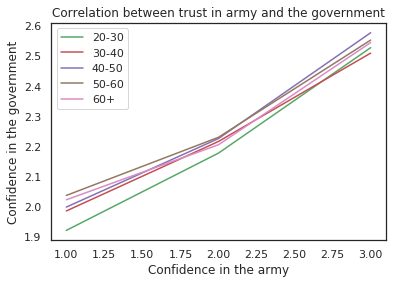

In [88]:



correlation_with_error("conarmy","confed","Correlation between trust in army and the government", "Confidence in the army","Confidence in the government")


There is a pretty strong correlation between the confidence in the army and the confidence in the federal government.

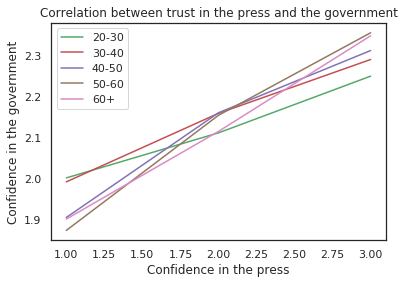

In [89]:
correlation_with_error("conpress","confed","Correlation between trust in the press and the government", "Confidence in the press","Confidence in the government")

We see a similarly strong correlation between the confidence in the press and the confidence in the government which makes sense considering people would think a more free press indicates a less oppresive regime

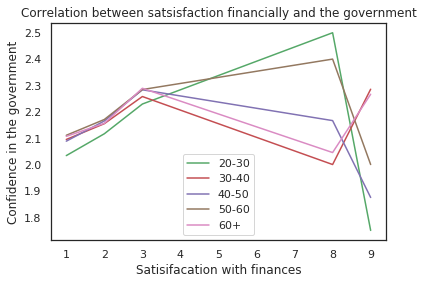

In [90]:

correlation_with_error("satfin","confed","Correlation between satsisfaction financially and the government", "Satisifacation with finances","Confidence in the government")


This is interesting as the there is an upward trend until a point and then thre is a huge divergence between various ages after that. Unsure how useful it might prove to the model.

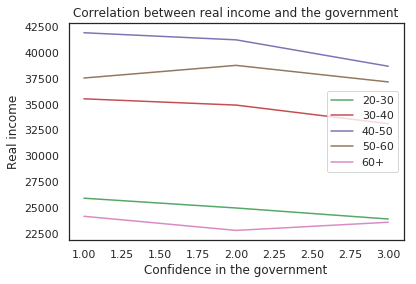

In [139]:
correlation_with_error("confed","realinc","Correlation between real income and the government","Confidence in the government", "Real income")

Interesting observarion that increasing confidence in the federal government is correlated with lower incomes.

Looking at these correlations, the increased trust in the government, particularly among youg people can be attributed to 3 major factors. Falling real income for their age group, highest ever confidence in the government among democrats due to 8 years of a democratic president and increasing confidence in the press(particularly sharply from 2010 onwards). Now I am going to build a regression model to predict confidence in the government on the basis of the above factors.

In [140]:
import statsmodels.formula.api as smf


In [141]:
gss['realinc2']=gss['realinc']**2
model = smf.ols('confed ~ age + year + realinc2 + conpress +partyid', data=gss)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 confed   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     279.3
Date:                Sat, 06 Apr 2019   Prob (F-statistic):          3.06e-294
Time:                        16:37:37   Log-Likelihood:                -37448.
No. Observations:               36971   AIC:                         7.491e+04
Df Residuals:                   36965   BIC:                         7.496e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.9122      0.542     -9.065      0.000      -5.974      -3.850
age            0.0001      0.000      0.568      0.570      -0.000       0.001
year           0.0034      0.000     12.388      0.000       0.003       0.004
realinc2   -4.089e-12   9.54e-13     -4.288      0.000   -5.96e-12   -2.22e-12
conpress       0.1651      0.005     30.610      0.000       0.155       0.176
partyid       -0.0144      0.002     -8.447      0.000      -0.018      -0.011
==============================================================================
Omnibus:                     2900.484   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1159.478
Skew:                          -0.206   Prob(JB):                    1.67e-252
Kurtosis:                       2.236   Cond. No.                     6.40e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.4e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

No handles with labels found to put in legend.


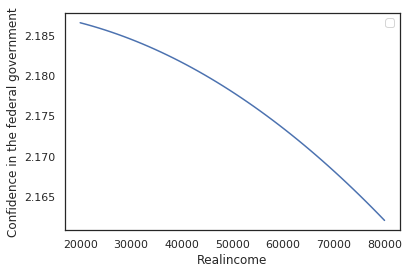

In [142]:

results = model.fit()
results.summary()
df = pd.DataFrame()
df['realinc'] = np.linspace(20000, 80000)
df['realinc2']=df['realinc']**2
df['partyid']=2
df['conpress'] = 2
df['conarmy']=2
df['year']=2003
df['age']=40
results = model.fit()
pred12 = results.predict(df)
plt.plot(df['realinc'], pred12)

plt.xlabel('Realincome')
plt.ylabel('Confidence in the federal government')
plt.legend();

The regression model shows the same trends we have hypothesized with the confidence in the federal government falling with real income. Swapping out the explanatory variable allows to visualize the other effects. 

**Random correlations mapped, not for the report**

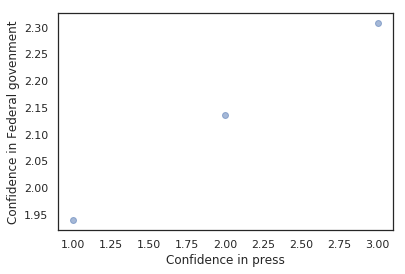

In [99]:


grouped = gss.groupby('conpress')
mean_income_by_age = grouped['confed'].mean()

plt.plot(mean_income_by_age, 'o', alpha=0.5)
plt.xlabel('Confidence in press')
plt.ylabel('Confidence in Federal govenment');



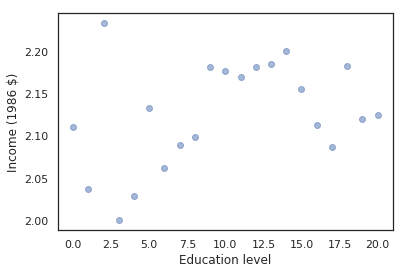

In [129]:


grouped = gss.groupby('educ')
mean_income_by_age = grouped['confed'].mean()

plt.plot(mean_income_by_age, 'o', alpha=0.5)
plt.xlabel('Education level')
plt.ylabel('Income (1986 $)');



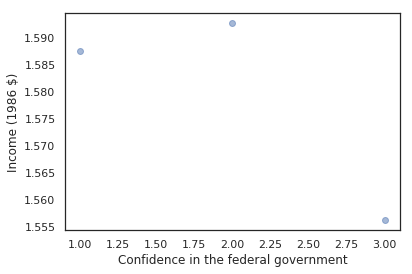

In [101]:


grouped = gss.groupby('confed')
mean_income_by_age = grouped['owngun'].mean()

plt.plot(mean_income_by_age, 'o', alpha=0.5)
plt.xlabel('Confidence in the federal government')
plt.ylabel('Income (1986 $)');



In [102]:
gss['owngun'].sem()


0.0025269745688671413

In [103]:
model = smf.ols('owngun ~ realinc + age + educ +year', data=gss)


/home/ssajjala/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/ssajjala/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Confidence in the executive branch')

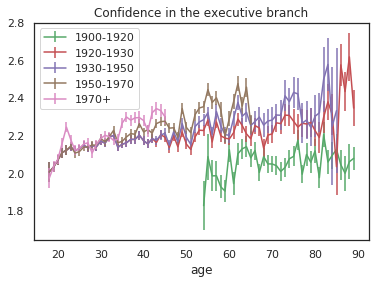

In [104]:
from matplotlib.pyplot import *
age2=gss[(gss['cohort']<1920)];
age3=gss[(gss['cohort']>1920) & (gss['age']<1930)];
age4=gss[(gss['cohort']>1930) & (gss['age']<1950)];
age5=gss[(gss['cohort']>1950) & (gss['age']<1970)];
age6=gss[(gss['cohort']>1970)];
fig, ax = subplots()
grouped6=age6.groupby('age')
grouped2=age2.groupby('age')
grouped3=age3.groupby('age')
grouped4=age4.groupby('age')
grouped5=age5.groupby('age')

series2=grouped2['confed'].mean()
series3=grouped3['confed'].mean()
series4=grouped4['confed'].mean()
series5=grouped5['confed'].mean()
series6=grouped6['confed'].mean()
err2=grouped2['confed'].sem()
err3=grouped3['confed'].sem()
err4=grouped4['confed'].sem()
err5=grouped5['confed'].sem()
err6=grouped6['confed'].sem()

series2.plot(color='C2',yerr=err2)
series3.plot(color='C3',yerr=err3)
series4.plot(color='C4',yerr=err4)
series5.plot(color='C5',yerr=err4)
series6.plot(color='C6',yerr=err5)
ax.legend(["1900-1920", "1920-1930", "1930-1950","1950-1970","1970+"])
plt.title("Confidence in the executive branch")

/home/ssajjala/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/ssajjala/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/ssajjala/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/ssajjala/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/ssajjala/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/ssajjala/anaconda3/lib/python3.7/site-packages/numpy/c

Text(0.5, 1.0, 'Confidence in the executive branch')

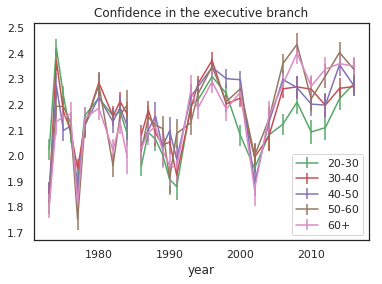

In [49]:
from matplotlib.pyplot import *
age2=gss[(gss['age']>20) & (gss['age']<30)];
age3=gss[(gss['age']>30) & (gss['age']<40)];
age4=gss[(gss['age']>40) & (gss['age']<50)];
age5=gss[(gss['age']>50) & (gss['age']<60)];
age6=gss[(gss['age']>60)];
fig, ax = subplots()
grouped6=age6.groupby('year')
grouped2=age2.groupby('year')
grouped3=age3.groupby('year')
grouped4=age4.groupby('year')
grouped5=age5.groupby('year')

series2=grouped2['confed'].mean()
series3=grouped3['confed'].mean()
series4=grouped4['confed'].mean()
series5=grouped5['confed'].mean()
series6=grouped6['confed'].mean()
err2=grouped2['confed'].sem()
err3=grouped3['confed'].sem()
err4=grouped4['confed'].sem()
err5=grouped5['confed'].sem()
err6=grouped6['confed'].sem()

series2.plot(color='C2',yerr=err2)
series3.plot(color='C3',yerr=err3)
series4.plot(color='C4',yerr=err4)
series5.plot(color='C5',yerr=err4)
series6.plot(color='C6',yerr=err5)
ax.legend(["20-30", "30-40", "40-50","50-60","60+"])
plt.title("Confidence in the executive branch")

/home/ssajjala/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/ssajjala/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/ssajjala/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/ssajjala/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/ssajjala/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/ssajjala/anaconda3/lib/python3.7/site-packages/numpy/c

Text(0, 0.5, 'Confidence in the federal government')

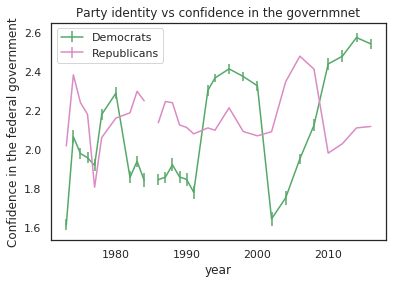

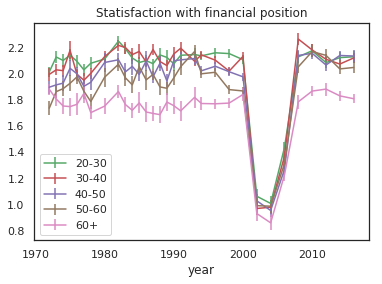

In [138]:
plot_with_error('satfin',"Statisfaction with financial position")

Financail stability also felt like a mjaor factor which could influence people's confidence in the various branches of the government. It seems to be fluctuating in the same range for most of the time but toiok a sharp fall between the years 2000 and 2004. One interesting thing to note is that the people who are close to retirement or have already done so have feel they are the least stable."